In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [2]:
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


## 1.1 Cleaning Data

In [7]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [8]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [9]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
# replace the missing values in 'reviews_per_month' with 0
bnb_df['reviews_per_month'].fillna(0, inplace=True)

In [11]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## 1.2 Statistics of the Data

In [12]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.090910,1.597283,0.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [13]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

# 2. Exploratory Data Analysis

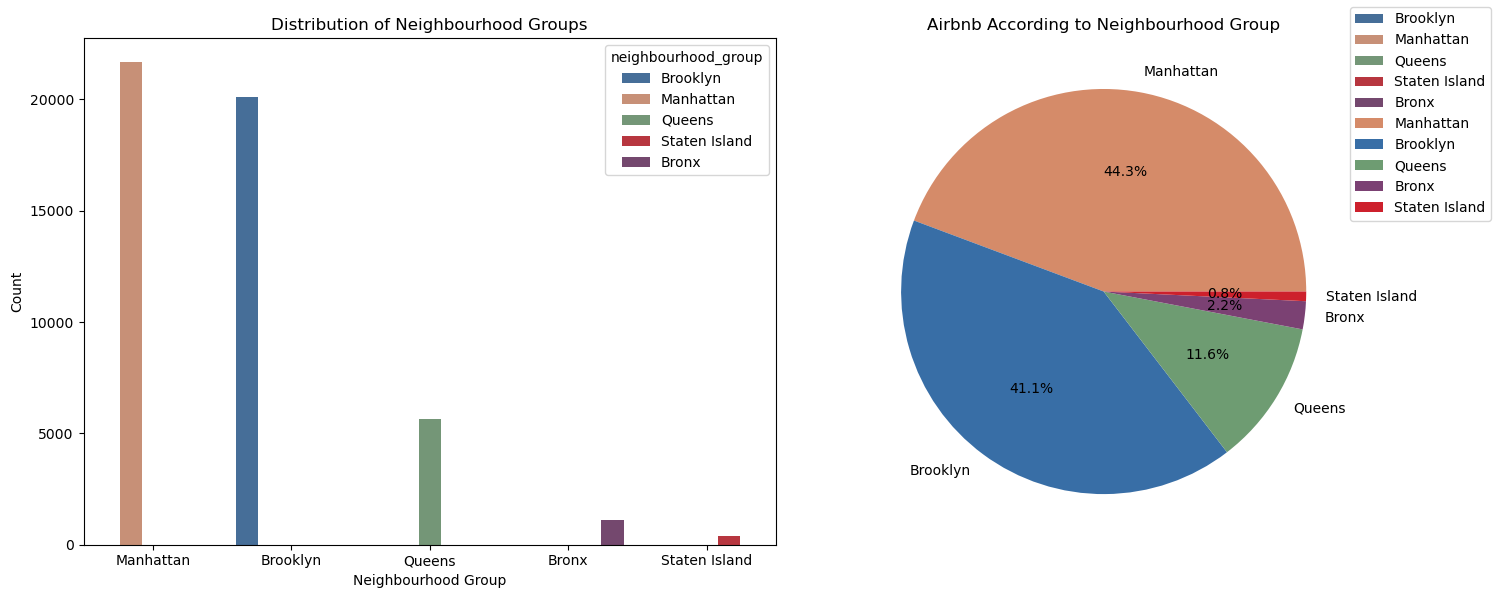

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

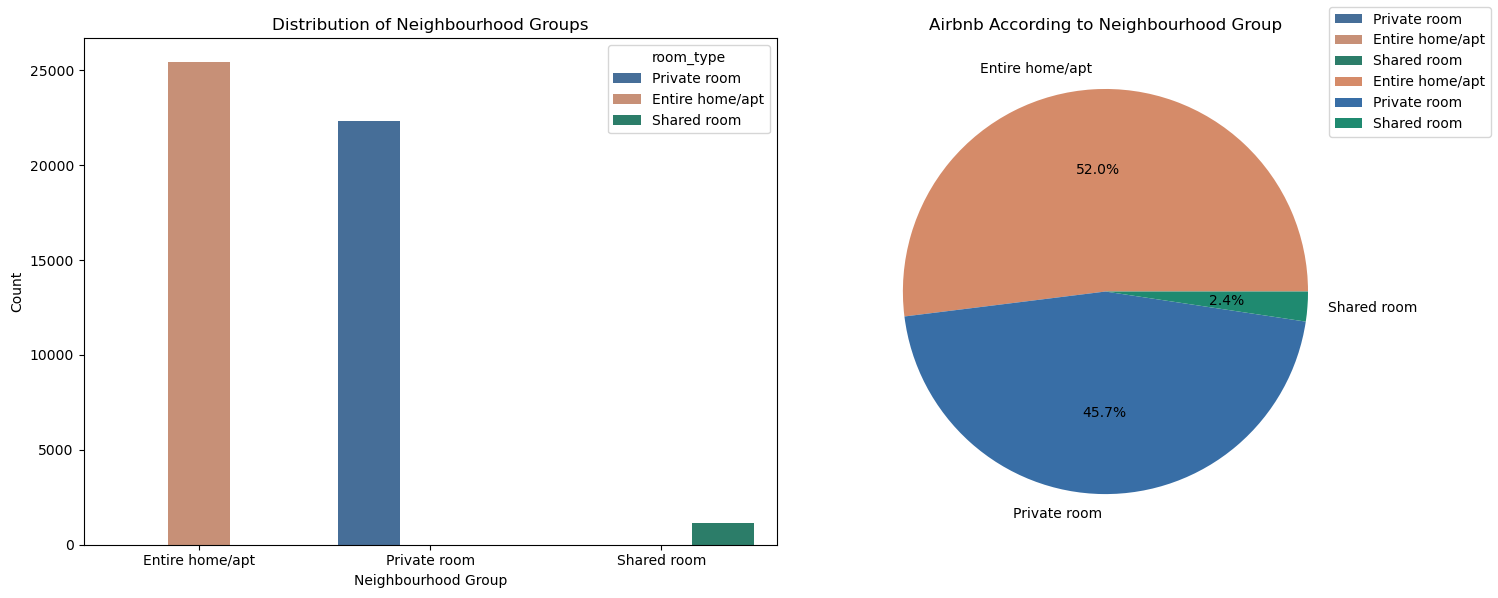

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

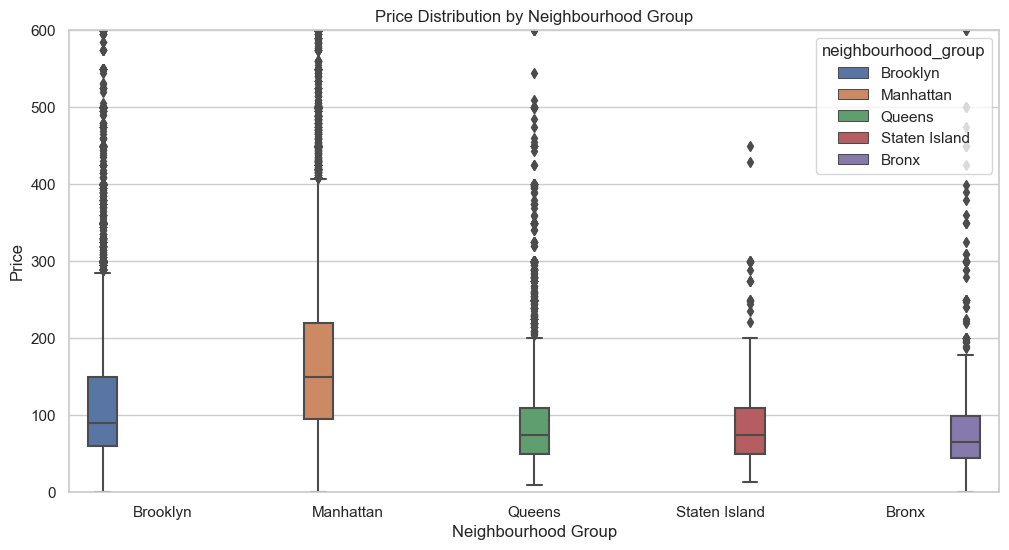

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.ylim(0, 600)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

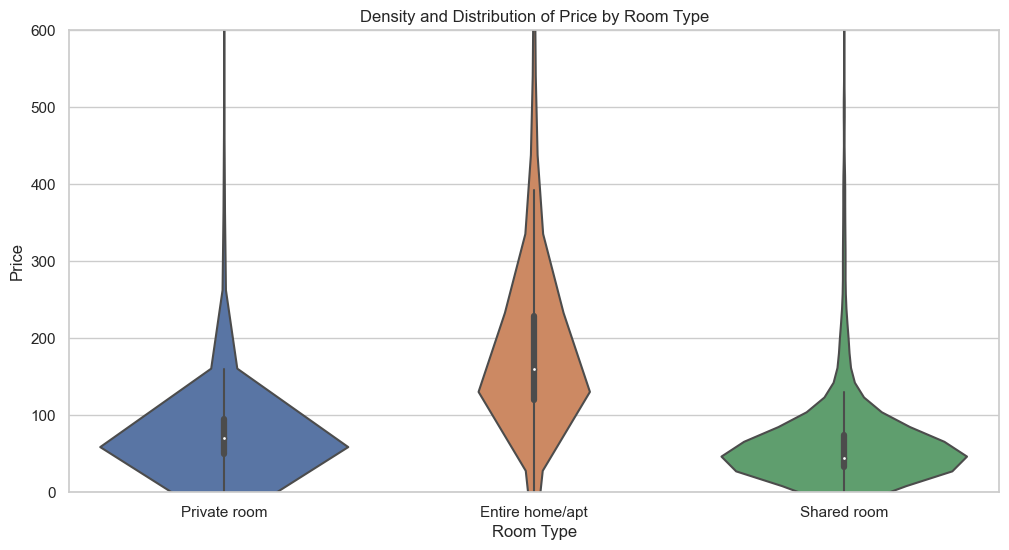

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', data=bnb_df)
plt.ylim(0, 600)
plt.title('Density and Distribution of Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

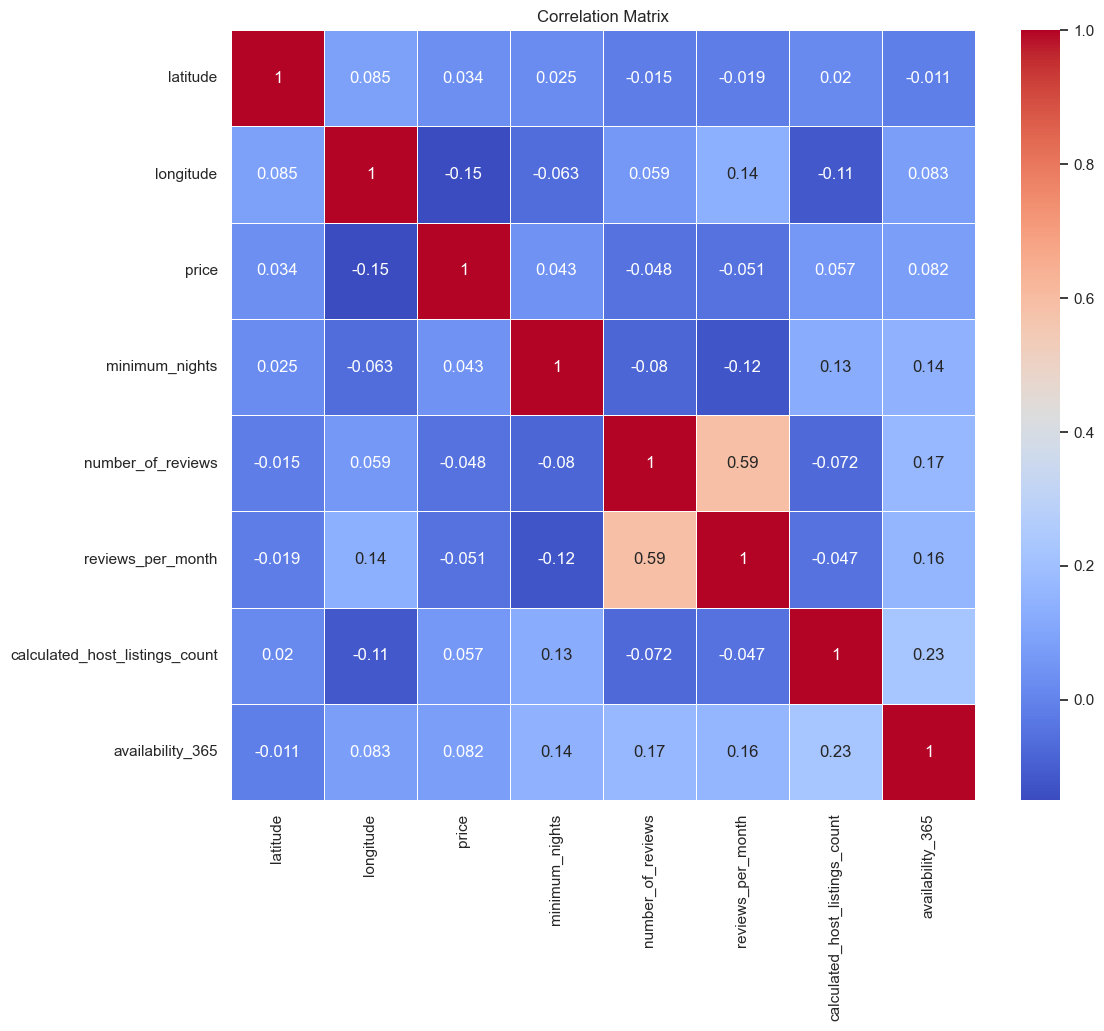

In [18]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


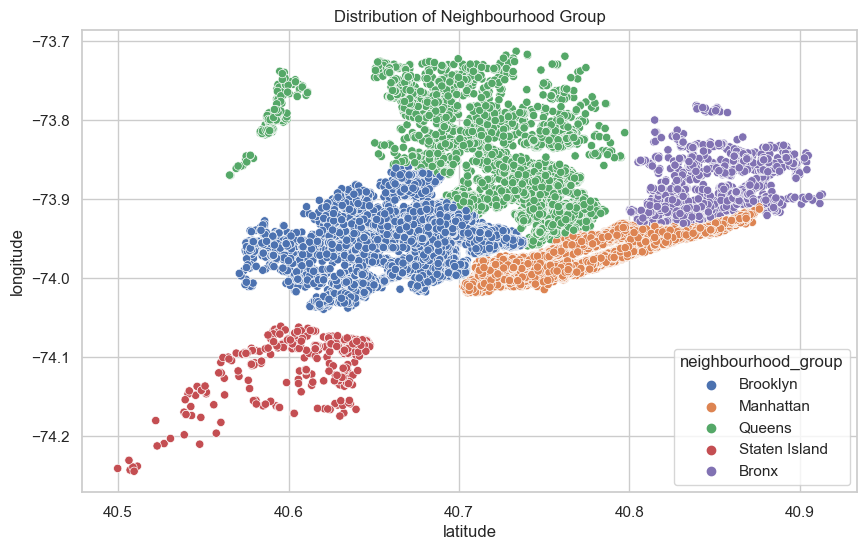

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

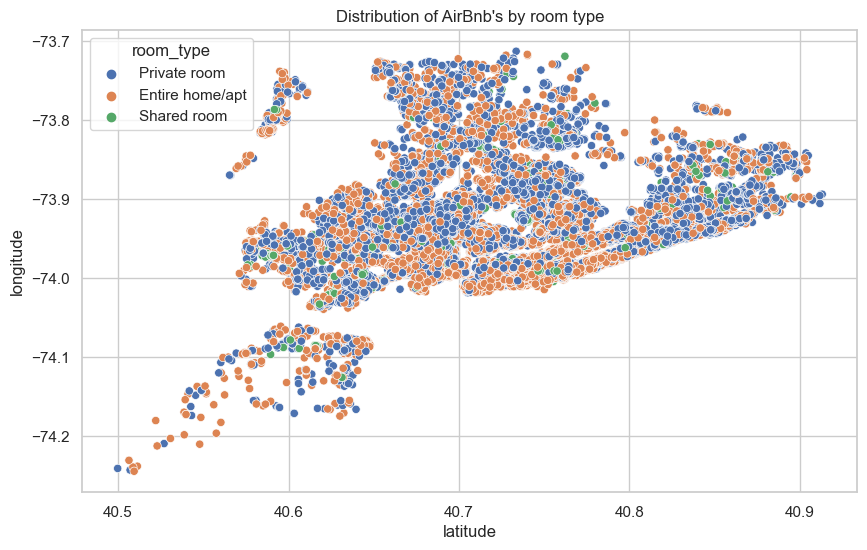

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

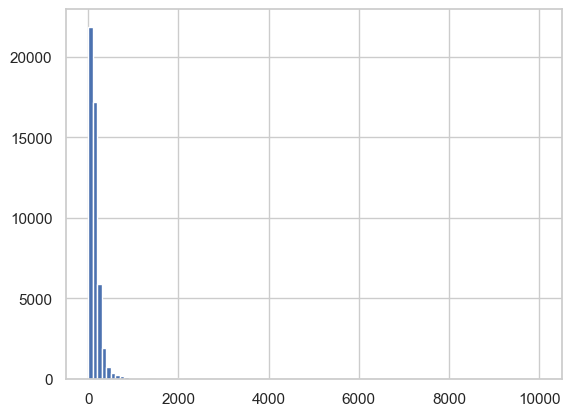

In [21]:
bnb_df['price'].hist(bins=100)
plt.show(block=True)

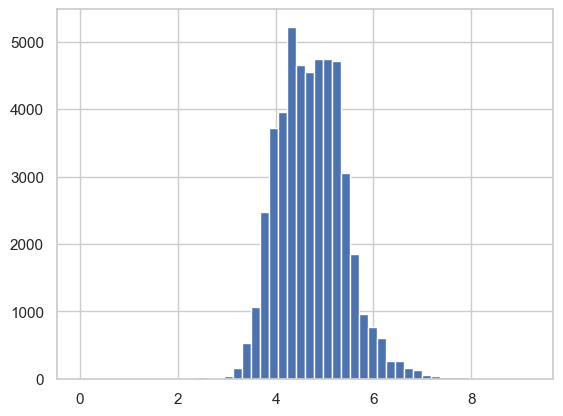

In [22]:
np.log1p(bnb_df['price']).hist(bins=50)
plt.show(block=True)

### Outlier Distribution

<Figure size 1000x600 with 0 Axes>

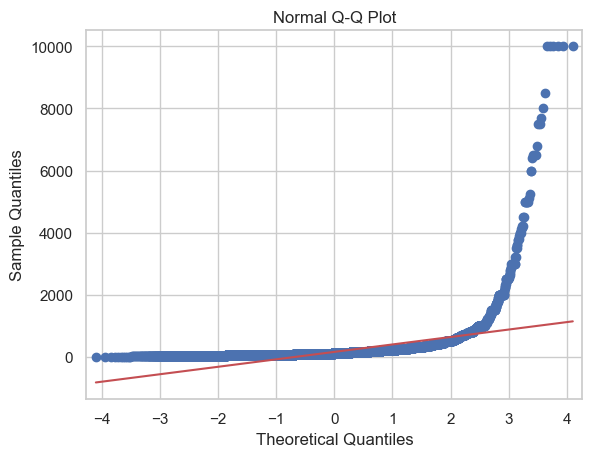

In [23]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


The plot shows significant deviation from the straight line (red), especially in the upper tail. The data points form a curve, indicating that the data does not follow a normal distribution. Moreover, the extreme deviation in the upper tail suggests that the data has heavy tails. This means there are more extreme values in the dataset than would be expected in a normal distribution. The sharp curve on the right side suggests that the data is positively skewed, as we have shown in the graph above.

<Figure size 1000x600 with 0 Axes>

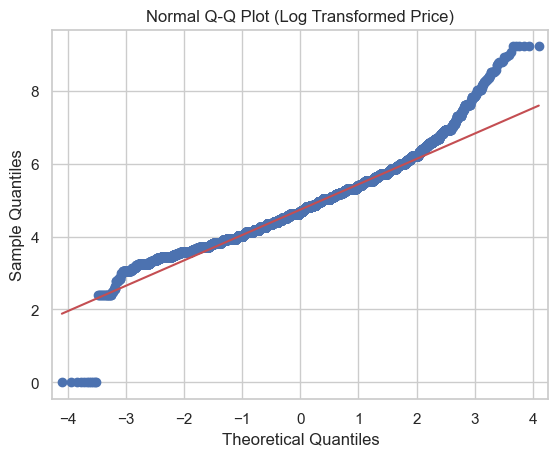

In [24]:
bnb_df['log_price'] = np.log1p(bnb_df['price'])

plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['log_price'], line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [25]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [26]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [27]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# 4. Feature Engineering

In [28]:
# encoding the categorical variables
bnb_df = pd.get_dummies(bnb_df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [29]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,5.010635,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,355,5.420535,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,365,5.017280,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,194,4.499810,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,4.394449,False,True,False,False,False,False


In [30]:
# transforms booleans into 0 and 1
for col in bnb_df.select_dtypes(include=['bool']).columns:
    bnb_df[col] = bnb_df[col].astype(int)

In [31]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,5.010635,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,5.420535,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,5.017280,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,4.499810,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,4.394449,0,1,0,0,0,0


## Handling Outliers By Capping 

In [32]:
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

10000 1250 629


We cap the values in 'price', 'minimum nights' and 'number of reviews' between the 5th and 95th percentiles.

In [33]:
bnb_df['price'] = np.clip(bnb_df['price'], bnb_df['price'].quantile(0.01), bnb_df['price'].quantile(0.99))
bnb_df['minimum_nights'] = np.clip(bnb_df['minimum_nights'], bnb_df['minimum_nights'].quantile(0.05), bnb_df['minimum_nights'].quantile(0.95))
bnb_df['number_of_reviews'] = np.clip(bnb_df['number_of_reviews'], bnb_df['number_of_reviews'].quantile(0.05), bnb_df['number_of_reviews'].quantile(0.95))

In [34]:
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

799 30 114


In [35]:
bnb_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,5.010635,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,5.420535,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,5.017280,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,114,4.64,1,194,4.499810,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,4.394449,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,9,4.262680,1,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,0.00,2,36,3.713572,1,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,0.00,1,27,4.753590,0,1,0,0,0,0
48893,40.75751,-73.99112,55,1,0,0.00,6,2,4.025352,0,1,0,0,0,1


# 5. Model

In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

class RegressionModel:
    def __init__(self, model, name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def __get_predictions(self, X_test):
        return self.model.predict(X_test)

    def get_metrics(self, X_test, y_test) -> pd.Series:
        y_pred = self.__get_predictions(X_test)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        r2 = metrics.r2_score(y_test, y_pred)
        metrics_series = pd.Series({
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'Name': self.name
        })
        return metrics_series

    def cross_validate(self, X, y, cv):

        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        mse_scores = cross_val_score(self.model, X, y, scoring='neg_mean_squared_error', cv=kf)
        rmse_scores = np.sqrt(-mse_scores)
        mae_scores = cross_val_score(self.model, X, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(self.model, X, y, scoring='r2', cv=kf)

        metrics_series = pd.Series({
            'MSE': -np.mean(mse_scores),
            'RMSE': np.mean(rmse_scores),
            'MAE': -np.mean(mae_scores),
            'R²': np.mean(r2_scores),
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series
    
    def visualize_metrics(self, X_test, y_test):
        y_pred = self.__get_predictions(X_test)

        # Plot residuals
        residuals = y_test - y_pred
        
        plt.figure(figsize=(20, 10))
        
        # Plot Residuals Distribution
        plt.subplot(2, 2, 1)
        sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Distribution of Residuals')

        # Plot Predicted vs Actual values
        plt.subplot(2, 2, 2)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')

        # Plot Residuals vs Fitted values
        plt.subplot(2, 2, 3)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted Values')

        # QQ Plot for Residuals
        plt.subplot(2, 2, 4)
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title('Normal Q-Q Plot (Residuals)')

        plt.tight_layout()
        plt.show()

# Linear Regression

In [71]:
X = bnb_df.drop(['price'],axis=1)
y = bnb_df['price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
lr_model = RegressionModel(LinearRegression(), name= 'Linear Regression')

In [74]:
lr_model.fit(X_train, y_train)

In [75]:
print(lr_model.get_metrics(X_test, y_test))

MSE           2410.123219
RMSE            49.093006
MAE              31.47918
R²               0.830312
Name    Linear Regression
dtype: object


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


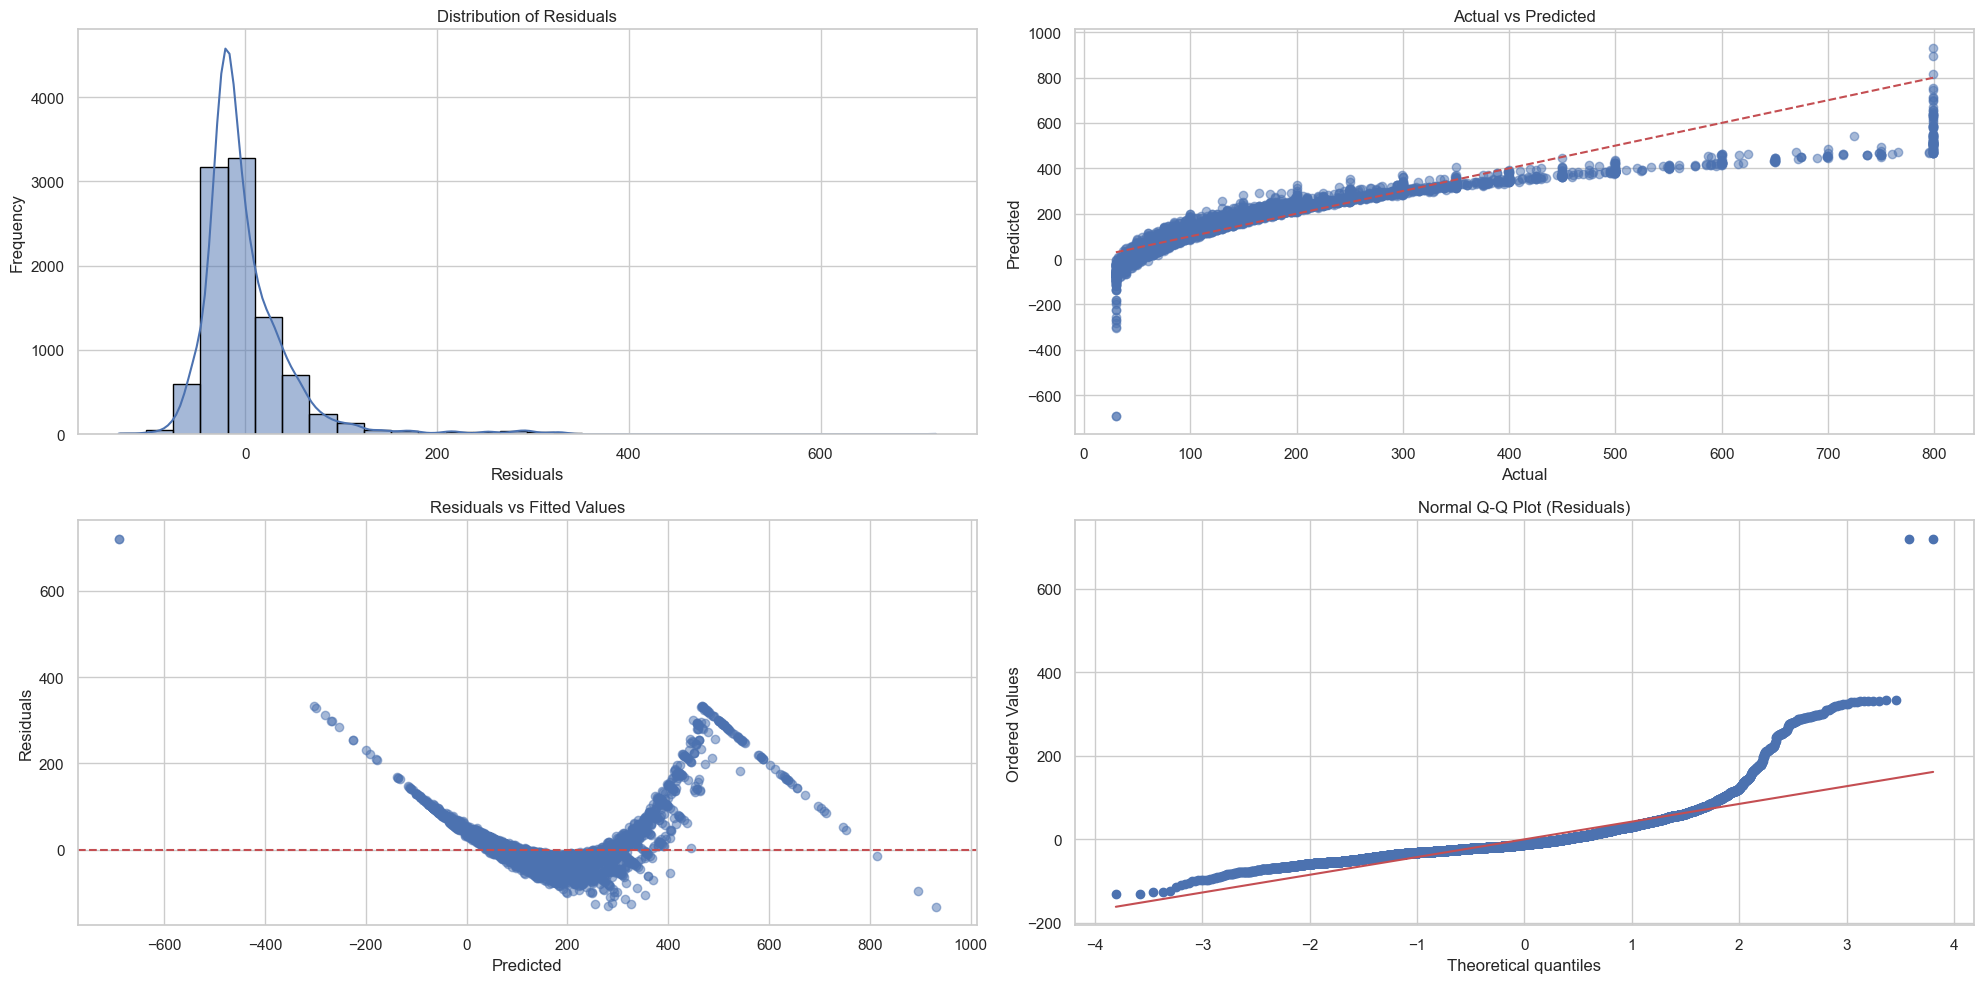

In [76]:
lr_model.visualize_metrics(X_test, y_test)

In [77]:
lr_model.cross_validate(X_train, y_train, 10)

MSE           2448.581935
RMSE            49.462623
MAE             31.554274
R²               0.836418
Name    Linear Regression
dtype: object

# Lasso Regression

In [78]:
lasso_model = RegressionModel(Lasso(), name='Lasso Regression')

In [79]:
lasso_model.fit(X_train, y_train)

In [80]:
print(lasso_model.get_metrics(X_test, y_test))

MSE          2503.959095
RMSE           50.039575
MAE            32.052051
R²              0.823705
Name    Lasso Regression
dtype: object


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


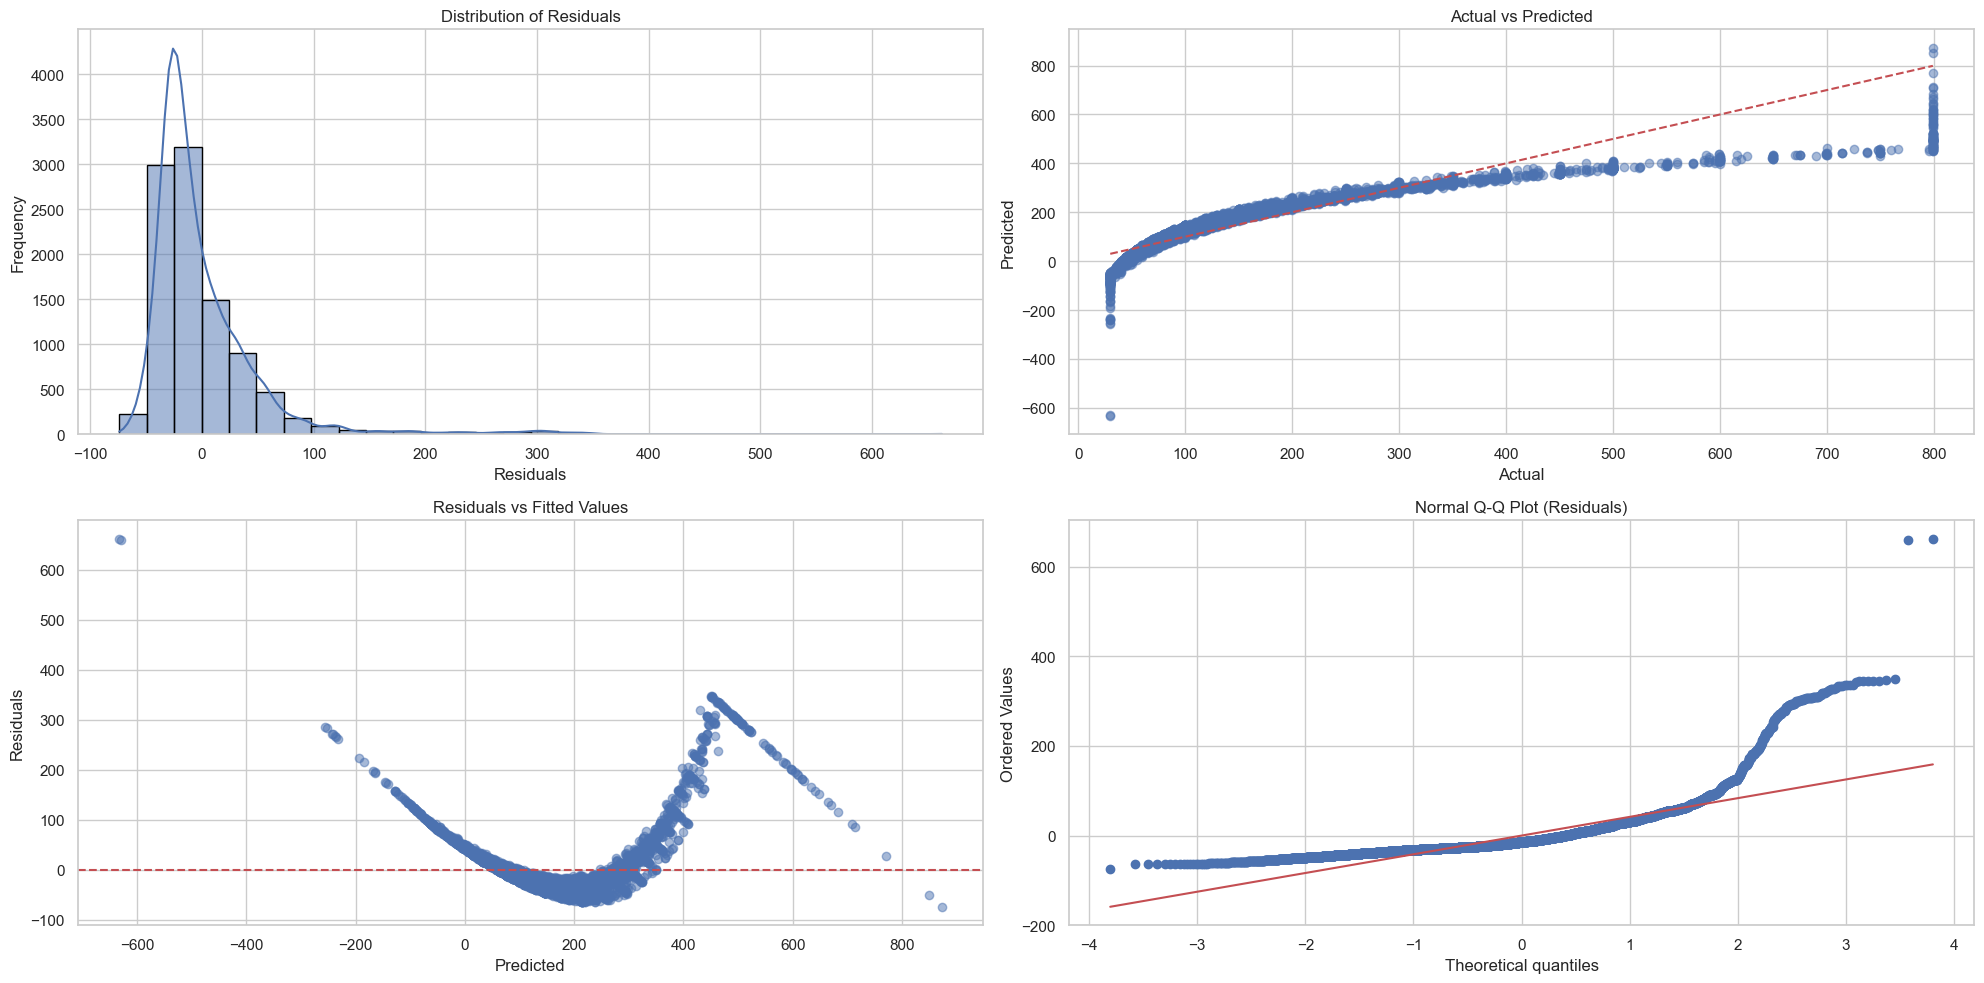

In [81]:
lasso_model.visualize_metrics(X_test, y_test)

In [82]:
lasso_model.cross_validate(X_train, y_train, 10)


MSE          2571.740096
RMSE           50.693421
MAE            32.294627
R²              0.828333
Name    Lasso Regression
dtype: object

# Ridge Regression

In [83]:
ridge_model = RegressionModel(Ridge(), name='Ridge Regression')

In [84]:
ridge_model.fit(X_train, y_train)

In [85]:
print(ridge_model.get_metrics(X_test, y_test))

MSE          2410.069874
RMSE           49.092462
MAE            31.478246
R²              0.830316
Name    Ridge Regression
dtype: object


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


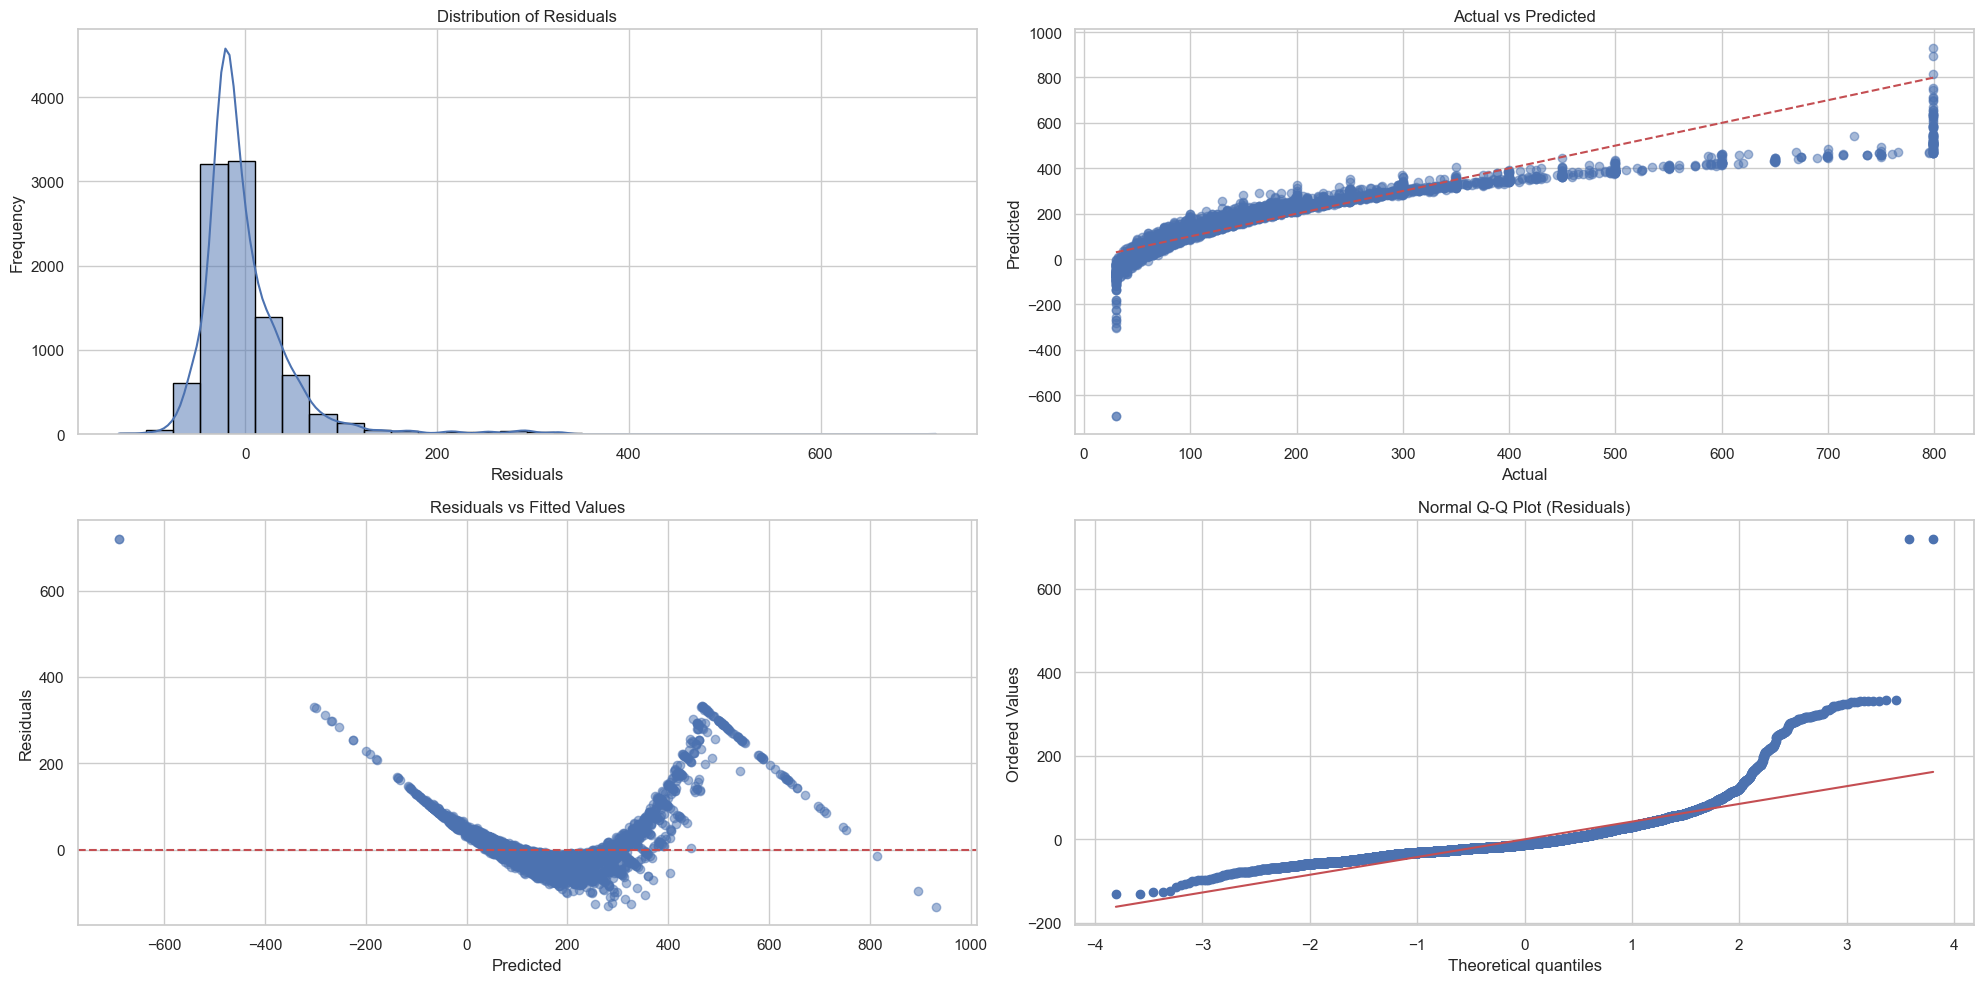

In [86]:
ridge_model.visualize_metrics(X_test, y_test)

In [87]:
ridge_model.cross_validate(X_train, y_train, 10)

MSE          2448.591876
RMSE           49.462707
MAE            31.553208
R²              0.836418
Name    Ridge Regression
dtype: object

Test different alphas in Ridge and Lasso regression models

In [92]:
# Define the range of alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Dictionary to store the results
ridge_results = {}
lasso_results = {}

# Test different alpha values for Ridge regression
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    ridge_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

# Test different alpha values for Lasso regression
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    lasso_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

print("Ridge Regression Results:")
for alpha, metrics in ridge_results.items():
    print(f"Alpha: {alpha}, MSE: {metrics['MSE']}, R²: {metrics['R²']}")

print("\nLasso Regression Results:")
for alpha, metrics in lasso_results.items():
    print(f"Alpha: {alpha}, MSE: {metrics['MSE']}, R²: {metrics['R²']}")


Ridge Regression Results:
Alpha: 0.0001, MSE: 2410.1232121594426, R²: 0.8303119232600275
Alpha: 0.001, MSE: 2410.1231500396575, R²: 0.8303119276336574
Alpha: 0.01, MSE: 2410.122530338298, R²: 0.8303119712645934
Alpha: 0.1, MSE: 2410.1164819386368, R²: 0.8303123971105837
Alpha: 1, MSE: 2410.069874215952, R²: 0.8303156785921211
Alpha: 10, MSE: 2410.365588482049, R²: 0.8302948584179385
Alpha: 100, MSE: 2415.576942956791, R²: 0.8299279457582174

Lasso Regression Results:
Alpha: 0.0001, MSE: 2410.1179298070733, R²: 0.8303122951713927
Alpha: 0.001, MSE: 2410.073722993255, R²: 0.8303154076136021
Alpha: 0.01, MSE: 2409.9686287314275, R²: 0.8303228069212707
Alpha: 0.1, MSE: 2422.7288511666634, R²: 0.8294244057138613
Alpha: 1, MSE: 2503.9590947455486, R²: 0.823705277440054
Alpha: 10, MSE: 2797.5100478836257, R²: 0.8030374143150998
Alpha: 100, MSE: 13806.823088956027, R²: 0.02791141795824381


As we can see, for the Ridge Regression the best result are obtained with an alpha of 0,1 and for the Lasso Regression with an alpha of 0,01

In [89]:
rf_model =RegressionModel(RandomForestRegressor(n_estimators=100, random_state=42), name= 'random')

In [90]:
rf_model.fit(X_train, y_train)

In [ ]:
print(rf_model.get_metrics(X_test, y_test))

MSE     0.010259
RMSE    0.101289
MAE     0.005828
R²      0.999999
Name      random
dtype: object


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


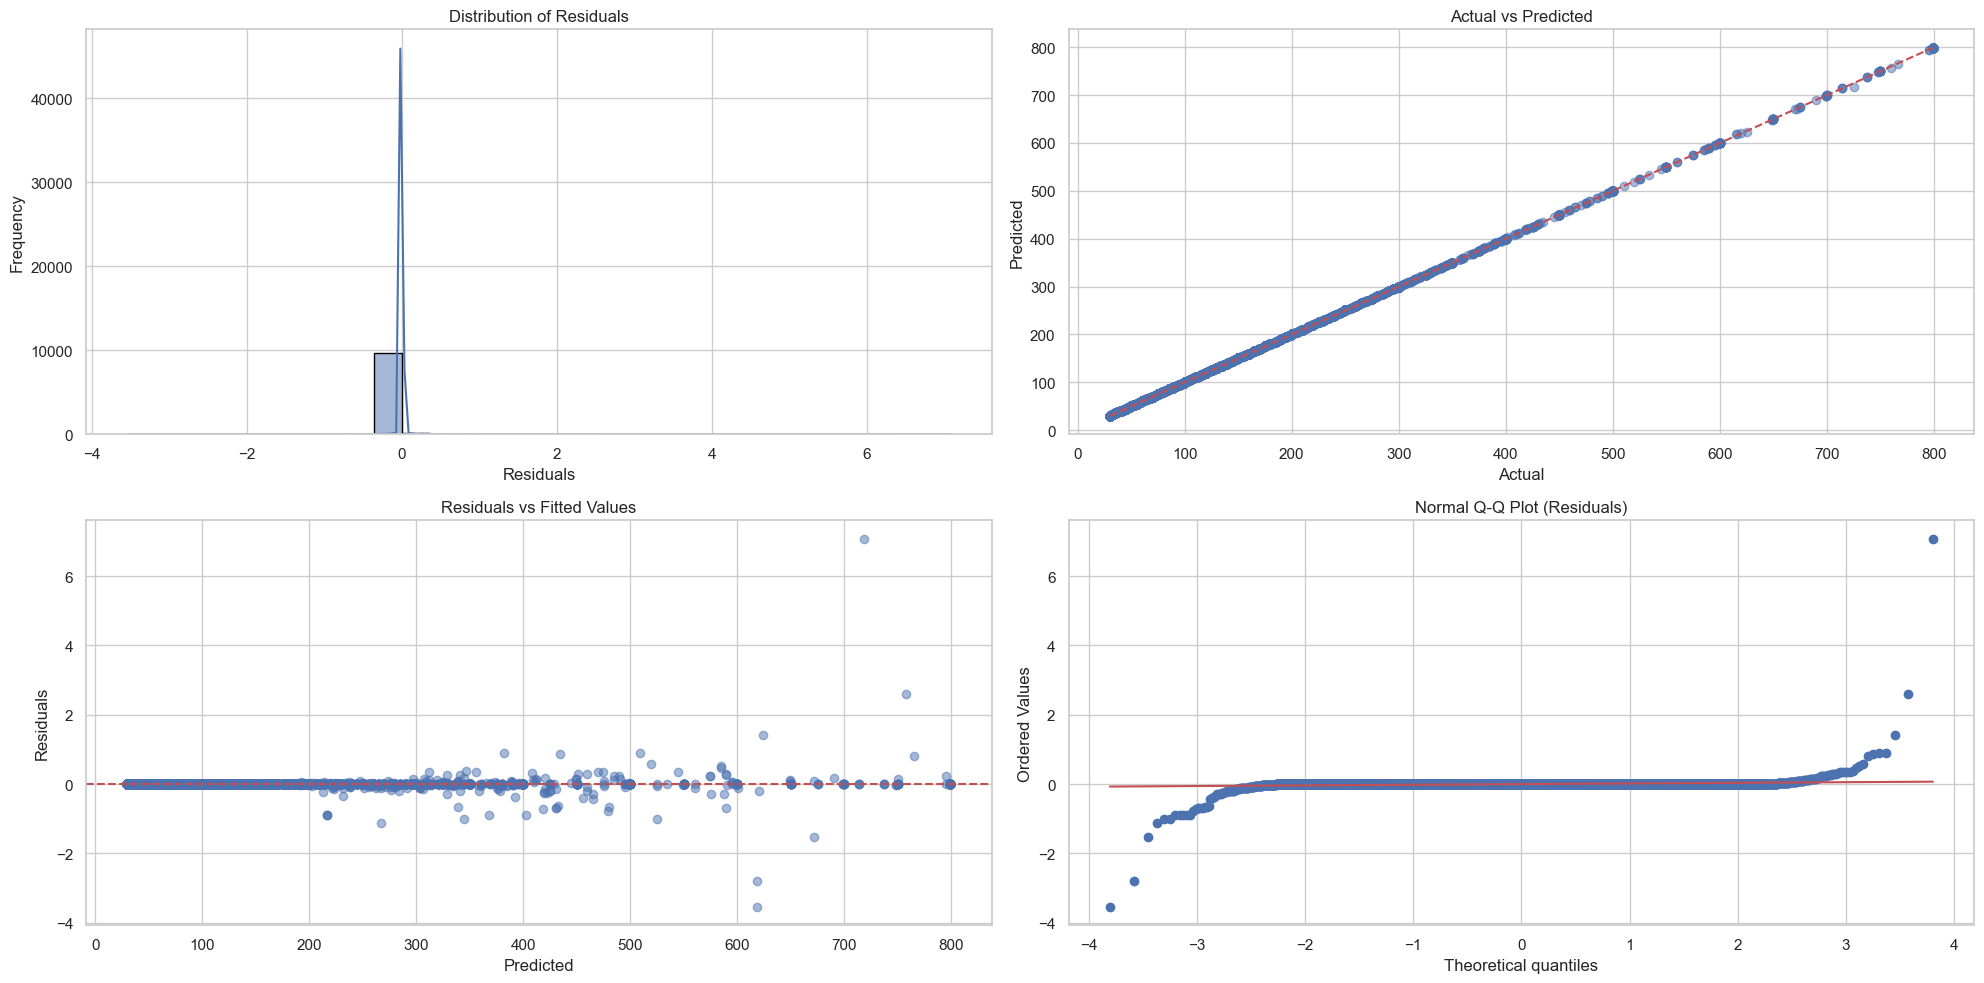

In [ ]:
rf_model.visualize_metrics(X_test, y_test)